# Hierarchical Clustering


## About

https://www.youtube.com/watch?v=iWFYCVRf2fk

Agglomerative hierarchical clustering differs from k-means in a key way. Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a "cluster." Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.

Along the way, we create what’s called a dendrogram. This is our "history."

The dendrogram plots out each cluster and the distance. We can use the dendrogram to find the clusters for any number we chose. 

![](dendogram_sample.jpeg)

In the dendrogram above, it’s easy to see the starting points for the first cluster (blue), the second cluster (red), and the third cluster (green). Only the first 3 are color-coded here, but if you look over at the red side of the dendrogram, you can spot the starting point for the 4th cluster as well. The dendrogram runs all the way until every point is its own individual cluster.

Let’s see how agglomerative hierarchical clustering works in Python. First, let’s import the necessary libraries from `scipy.cluster.hierarchy` and `sklearn.clustering`.

In [1]:
import random
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

- create our dendrogram
- determine how many clusters we want
- save the data points from those clusters 
- plot them


In [2]:
num_vars = ['calculatedfinishedsquarefeet','lotsizesquarefeet','structuretaxvaluedollarcnt','landtaxvaluedollarcnt']

# sample 

random.seed(123)
p = .01 # ~ 30,000 records

df_num = (pd.read_csv('data/properties_2016.csv',
                  skiprows=lambda i: i > 0 and random.random() > p)
      [num_vars]
      .dropna()
      .sample(1000, random_state=123))

# scale the data! min-max normalization would prob be best
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# The normalizer instance can then be used on sample vectors as any transformer:

df_num[df_num.columns] = normalizer.fit_transform(df_num[df_num.columns])

Make sure you convert your data into a matrix X with n samples and m features, so that X.shape == (n, m).

In [3]:
X = np.array(df_num)

(1000, 4)


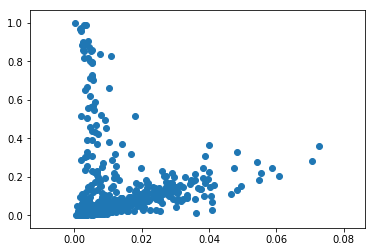

In [4]:
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

## Generate the distance matrix

In [5]:
# generate the linkage matrix
Z = linkage(X, 'ward')

'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 'ward' causes the `linkage` function to use the Ward variance minimization algorithm.

Ward is a good default choice, but it never hurts to play around with some other common linkage methods like 'single', 'complete', or 'average', along with the different distance metrics like 'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', or 'cosine'. Experimenting with different metrics is even more important if you have the feeling that your data should not just be clustered to minimize the overall intra cluster variance in euclidean space. 

Check the Cophenetic Correlation Coefficient of your clustering with help of the `cophenet` function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances.

## Evaluate the Pairwise Distances

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.6738516327155624

No matter what method and metric you pick, the `linkage` function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. Z[i] will tell us which clusters were merged in the i-th iteration, let's take a look at the first two points that were merged:

The resulting array has the format `[idx1, idx2, dist, sample_count]`.

In [7]:
Z[0]

array([436.    , 715.    ,   0.0001,   2.    ])

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 325 and 9098, as they only had a distance of 0. This created a cluster with a total of 2 samples.

In [8]:
Z[1]

array([ 79.     , 548.     ,   0.00031,   2.     ])

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 3939 and 5853, which had a distance of 0.00001. This again formed another cluster with a total of 2 samples.

The indices of the clusters until now correspond to our samples. Remember that we had a total of 10000 samples, so indices 0 to 9999. Let's have a look at the first 20 iterations:

In [9]:
Z[:20]

array([[ 436.     ,  715.     ,    0.0001 ,    2.     ],
       [  79.     ,  548.     ,    0.00031,    2.     ],
       [  29.     ,  398.     ,    0.00034,    2.     ],
       [ 391.     ,  912.     ,    0.00038,    2.     ],
       [ 418.     ,  591.     ,    0.00041,    2.     ],
       [  81.     ,  485.     ,    0.00047,    2.     ],
       [ 668.     , 1000.     ,    0.00048,    3.     ],
       [ 571.     ,  718.     ,    0.00055,    2.     ],
       [  26.     ,  419.     ,    0.00058,    2.     ],
       [ 385.     ,  702.     ,    0.00058,    2.     ],
       [ 408.     , 1004.     ,    0.0007 ,    3.     ],
       [ 164.     ,  635.     ,    0.00073,    2.     ],
       [  10.     ,  965.     ,    0.00075,    2.     ],
       [ 665.     ,  959.     ,    0.00075,    2.     ],
       [ 156.     ,  383.     ,    0.00083,    2.     ],
       [ 564.     ,  600.     ,    0.00097,    2.     ],
       [  89.     ,  154.     ,    0.00101,    2.     ],
       [ 109.     ,  538.     ,

## Create Dendogram

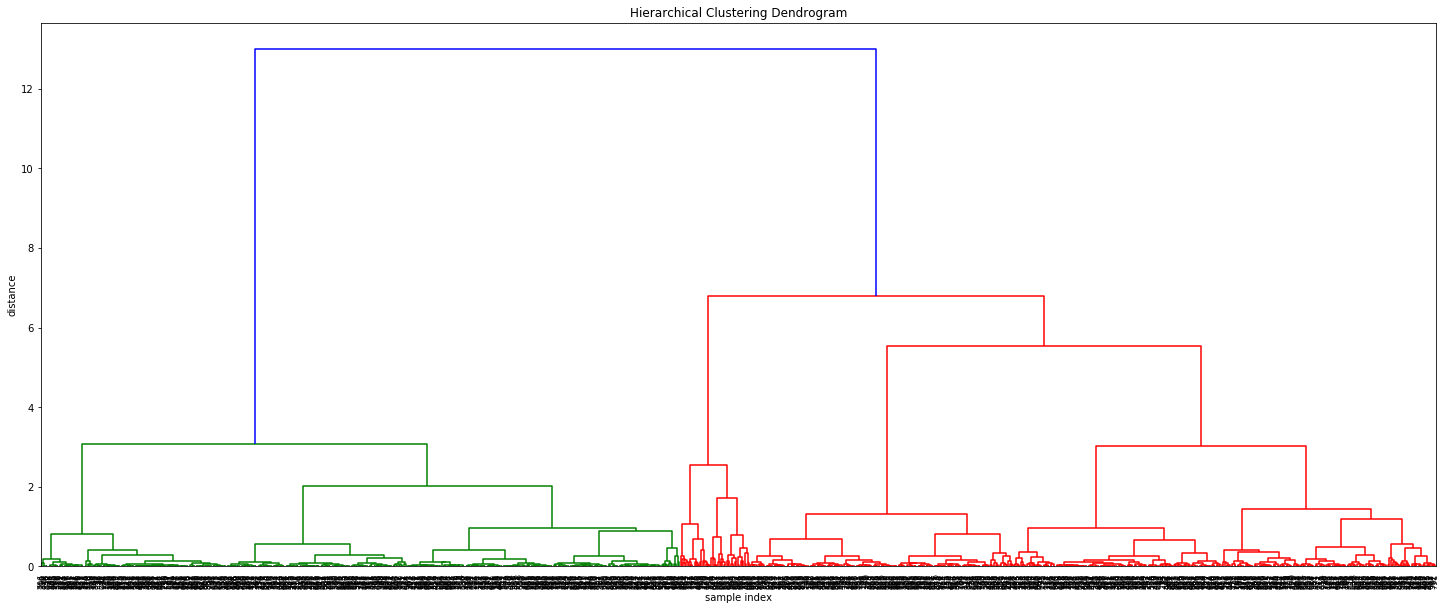

In [10]:
# create dendrogram
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


# dendrogram = dendrogram(linkage(X, method='ward'))

On the x axis we see labels. Unless otherwise specified, these labels are the indices of your samples in X. On the y axis we see the distances (of the 'ward' method in our case).

Starting from each label at the bottom, we will see a vertical line up to a horizontal line. The height of that horizontal line tells us about the distance at which this label was merged into another label or cluster. We find other clusters by following the vertical lines down again. If we don't encounter another horizontal line, it was just merged with the other label, otherwise it was merged into another cluster that was formed earlier.

Summarizing:

- Horizontal lines are cluster merges
- Vertical lines tell you which clusters/labels were part of merge forming that new cluster
- Heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
- You can also see that from distances > 15 up there's a huge jump of the distance to the final merge at a distance of approx. 40. Let's have a look at the distances of the last 4 merges:

In [11]:
Z[-4:,2]

array([ 3.08657,  5.52923,  6.78752, 13.00656])

Such distance jumps / gaps in the dendrogram are pretty interesting for us. They indicate that something is merged here, that maybe just shouldn't be merged. In other words: maybe the things that were merged here really don't belong to the same cluster, telling us that maybe there's just 2 clusters here.

Looking at indices in the above dendrogram also shows us that the green cluster only has indices >= 100, while the red one only has such < 100. This is a good thing as it shows that the algorithm re-discovered the two classes in our toy example.

In case you're wondering about where the colors come from, you might want to have a look at the `color_threshold` argument of the `dendrogram` function. We did not specify a value, so the function defaulted to a distance cut-off value of 70 % of the final merge and then colored the first clusters below that in individual colors.

### A Basic Dendogram

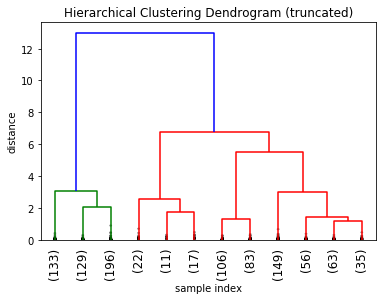

In [12]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # to show counts of observations in brackets 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### A Fancy Dendogram

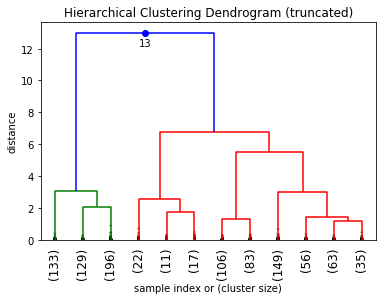

In [13]:
# Annotating the distances inside the dendrogram

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

## Selecting a Distance Cut-Off

### Determining the Number of Clusters

As explained above already, a huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters.

Generally we will prefer to do this process manually, as it allows us to gain insights into our data and perform sanity checks on the edge cases. For this data, we will choose a cut-off at 15, as the jump is pretty obvious.

As we can see, we ("surprisingly") have two clusters at this cut-off.

In general for a chosen cut-off value, `max_d`, you can always simply count the number of intersections with vertical lines of the dendrogram to get the number of formed clusters. Say we choose a cut-off of `max_d=15`, we'd get 4 final clusters:

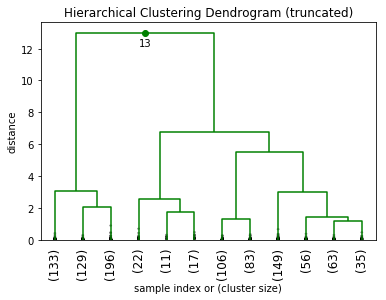

In [14]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=15,
)
plt.show()

## Retrieve the Clusters

Now, let's finally have a look at how to retrieve the clusters, for different ways of determining k. We can use the `fcluster` function.

### Knowing max_d:

Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [15]:
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Knowing k:

Another way starting from the dendrogram is to say "i can see i have k=2" clusters. You can then use:

In [16]:
k=2
clusters = fcluster(Z, k, criterion='maxclust')

Using the Inconsistency Method (which is the default):

If you're really sure you want to use the inconsistency method to determine the number of clusters in your dataset, you can use the default criterion of `fcluster` and hope you picked the correct values:

In [17]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 8, depth=10)

array([10, 16,  6, 16,  5, 10, 11, 16,  6, 15,  2, 15, 16, 16, 13, 16,  2,
        8, 16, 16, 16, 13,  3, 10,  7,  2,  4,  7,  6,  2,  2,  4,  4,  7,
       10, 11, 10,  7, 16, 16,  2, 15,  4,  1,  2,  6, 16,  2,  9,  2, 11,
       16, 16,  4, 11, 13, 11,  4, 12,  1,  7, 10, 13,  6, 13, 13, 11,  2,
       12,  8,  9, 12, 12, 11, 13,  8,  1, 11,  2,  6,  3,  2, 10, 16,  3,
       13,  6,  9,  4,  3,  7,  4, 16,  5, 13, 13,  4,  6, 11, 10, 13, 16,
        4,  2,  8, 13, 16,  8,  5, 13,  2,  7, 12,  2,  7,  4,  3, 16, 11,
        7,  2, 13, 16, 16,  7,  6, 13,  2,  2,  3,  1,  5, 11,  7,  2, 14,
       14,  4,  7, 16,  6,  7,  4,  4, 15,  2,  3,  1,  9, 10, 16,  7, 16,
       13,  3, 11,  2,  8,  8, 12,  7,  2,  9, 11,  2, 16, 10,  9, 10,  2,
        8,  3,  2, 15,  6, 15, 11, 14, 13,  9, 12, 10,  7, 10, 11,  6,  2,
        5, 15,  2, 10,  1, 10, 15,  7,  2, 16, 16, 10, 12,  5,  1, 16,  5,
        7,  4, 16, 11, 10,  6,  3,  1,  7, 16,  4,  5,  6, 13,  2,  2, 11,
        8, 16, 13, 13,  9

## Visualizing Your Clusters

If your data is very low dimensional, you can easily visualize the resulting clusters:

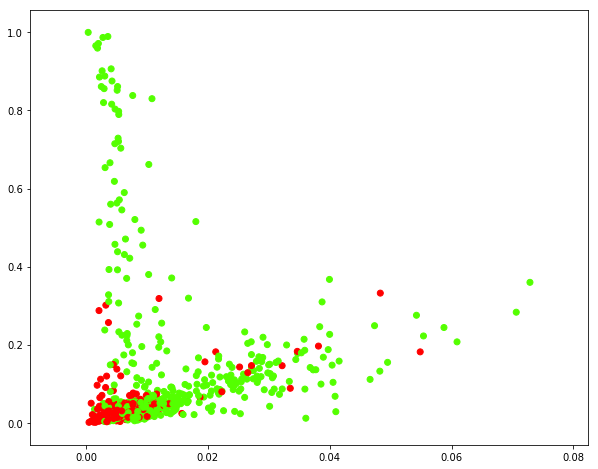

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Optional method

In [19]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [20]:
# save clusters for chart
y_hc = hc.fit_predict(X)

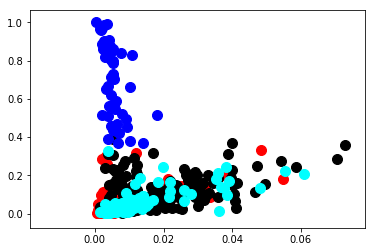

In [21]:
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=100, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=100, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=100, c='cyan')


## Add cluster ids to dataframe

### TO-DO